In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r'D:\College\Year 3 - Term 2\Data Mining\Assignment 2\2023-01-city-of-london-street.csv')

In [64]:
df.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,4a14d4745da0a2219ecf913fdc28a0c84ae8408954cac6...,2023-01,City of London Police,City of London Police,-0.106220,51.518275,On or near B500,E01000916,Camden 027B,Other theft,Under investigation,NaN
1,e6e32581c99c5b0f46e5a4d6343e213df349d7069e847d...,2023-01,City of London Police,City of London Police,-0.107010,51.521480,On or near Saffron Street,E01000916,Camden 027B,Other crime,Under investigation,NaN
2,7b7cb8e7debe8b0ec1637e7cb1dad832cea4eba16c5f52...,2023-01,City of London Police,City of London Police,-0.110350,51.518090,On or near Holborn,E01000917,Camden 027C,Theft from the person,Investigation complete; no suspect identified,NaN
3,f7fc44e1e76332f0f575b788522329e6f3ce566fd7472d...,2023-01,City of London Police,City of London Police,-0.107682,51.517786,On or near B521,E01000917,Camden 027C,Other crime,Under investigation,NaN
4,8083dafd1770af1afca2320c13cbae2420bd2877d9ef29...,2023-01,City of London Police,City of London Police,-0.111596,51.518281,On or near Chancery Lane,E01000914,Camden 028B,Other theft,Under investigation,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Crime ID               663 non-null    object 
 1   Month                  719 non-null    object 
 2   Reported by            719 non-null    object 
 3   Falls within           719 non-null    object 
 4   Longitude              674 non-null    float64
 5   Latitude               674 non-null    float64
 6   Location               719 non-null    object 
 7   LSOA code              674 non-null    object 
 8   LSOA name              674 non-null    object 
 9   Crime type             719 non-null    object 
 10  Last outcome category  663 non-null    object 
 11  Context                0 non-null      float64
dtypes: float64(3), object(9)
memory usage: 67.5+ KB


In [5]:
df['Crime type'].value_counts()

Other theft                     159
Violence and sexual offences    110
Theft from the person            94
Shoplifting                      64
Drugs                            63
Public order                     60
Anti-social behaviour            56
Vehicle crime                    25
Burglary                         22
Criminal damage and arson        22
Other crime                      17
Robbery                          13
Possession of weapons             8
Bicycle theft                     6
Name: Crime type, dtype: int64

### The Crime Type we're going to focus on is 'Violence and sexual offences' with count value of 110

In [6]:
# Taking a copy of what we're going to focus on
new_df = df[df['Crime type'] == 'Violence and sexual offences']

In [7]:
# dropping any row containing NaN in the 'Longitude' or 'Latitude' columns
new_df = new_df.dropna(subset=['Longitude', 'Latitude'])

In [8]:
new_df.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
23,3d531c6de0595be429dfc66567bc5b65f1d50040f2e700...,2023-01,City of London Police,City of London Police,-0.097078,51.519045,On or near A1,E01000001,City of London 001A,Violence and sexual offences,Investigation complete; no suspect identified,NaN
50,dcc965bea74a8553ff1d380d80c8402e8451e6288feed3...,2023-01,City of London Police,City of London Police,-0.091498,51.520483,On or near,E01000002,City of London 001B,Violence and sexual offences,Under investigation,NaN
51,4b9fdc83095120a04abaa5a74fa3fd9e5062086ebb5377...,2023-01,City of London Police,City of London Police,-0.090105,51.520001,On or near Milton Court,E01000002,City of London 001B,Violence and sexual offences,Under investigation,NaN
52,362d774996fe58c5ca112c152a3ba2f0185f0998bb3565...,2023-01,City of London Police,City of London Police,-0.092971,51.516271,On or near Aldermanbury,E01000002,City of London 001B,Violence and sexual offences,Investigation complete; no suspect identified,NaN
53,eb4381219115b6ff0cba75cf8e41b9df93e101f2bdc62a...,2023-01,City of London Police,City of London Police,-0.093271,51.518066,On or near St Alphage Garden,E01000002,City of London 001B,Violence and sexual offences,Unable to prosecute suspect,NaN


In [9]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 23 to 668
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Crime ID               99 non-null     object 
 1   Month                  99 non-null     object 
 2   Reported by            99 non-null     object 
 3   Falls within           99 non-null     object 
 4   Longitude              99 non-null     float64
 5   Latitude               99 non-null     float64
 6   Location               99 non-null     object 
 7   LSOA code              99 non-null     object 
 8   LSOA name              99 non-null     object 
 9   Crime type             99 non-null     object 
 10  Last outcome category  99 non-null     object 
 11  Context                0 non-null      float64
dtypes: float64(3), object(9)
memory usage: 10.1+ KB


# 1. K-Means

## Using the Elbow Method to determine a suitable value for K:

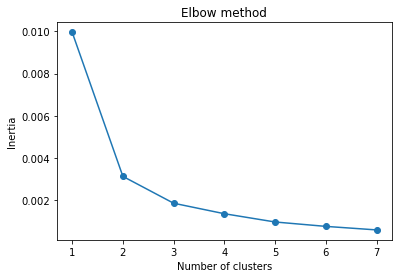

In [188]:
x = new_df['Longitude']
y = new_df['Latitude']
data = list(zip(x, y))
inertias = []

for i in range(1,8):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,8), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show();

### So based on that, choosing K = 2 or 3 is a suitable clustering number

## Applying K-means clustering technique:

In [189]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

KMeans(n_clusters=3)

## Visualizing clusters resulted from K-means:

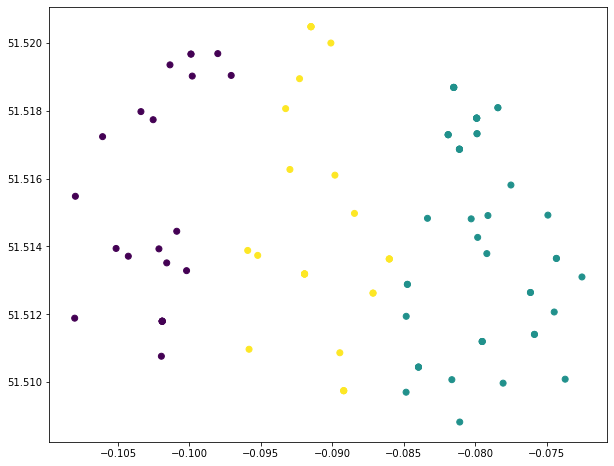

In [190]:
plt.figure(figsize=(10, 8)) 
plt.scatter(x, y, c=kmeans.labels_)
plt.show()

## Computing the silhouette measure for K-mean clusters:

In [191]:
score = silhouette_score(data, kmeans.labels_, metric='euclidean')
print('For K = 3, the Silhouetter Score is: %.3f' % score)

For K = 3, the Silhouetter Score is: 0.496


# 2. DB-Scan

## Applying DB-Scan:

In [59]:
x = new_df['Longitude']
y = new_df['Latitude']
data = list(zip(x, y))

# Create a DBSCAN object with specified parameters
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.0011152515, min_samples=4, metric='euclidean')

# Fit the DBSCAN model to the data
dbscan.fit(data)

# Retrieve the cluster labels for each data point
labels = dbscan.labels_
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)

# print the number of clusters
print(f"Number of clusters found: {num_clusters}")

Number of clusters found: 7


## Visualizing clusters resulted from DB-Scan:

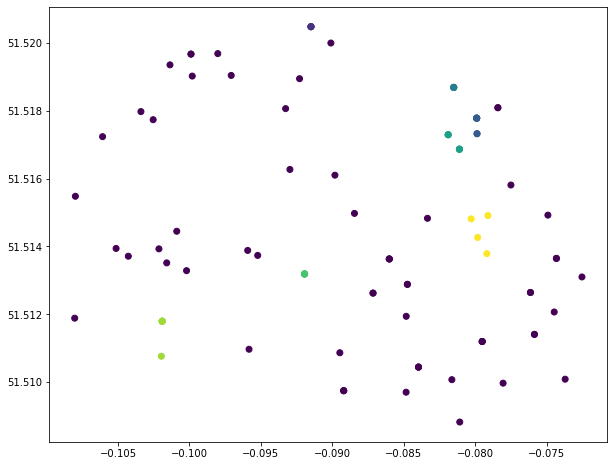

In [61]:
plt.figure(figsize=(10, 8)) 
plt.scatter(x, y, c=dbscan.labels_)
plt.show()

## Computing the silhouette measure for DB-Scan clusters:

In [62]:
silhouette_score = silhouette_score(data, labels, metric='euclidean')
print('For K = 3, the Silhouetter Score for db scan is: %.3f' % silhouette_score)

For K = 3, the Silhouetter Score for db scan is: -0.065


# Conclusion:
## As we can see our data didn't work with the DBscan method to make clusters, but with K-means it worked just fine. 
## DBscan is a density-based clustering algorithm that groups together data points that are close to each other in terms of distance and have a high density, that explains why it did not work with the chosen data

# Working on another column to see if the DBscan would work on it:

In [63]:
DrugsDF = df[df['Crime type'] == 'Drugs']

In [64]:
DrugsDF = DrugsDF.dropna(subset=['Longitude', 'Latitude'])

In [65]:
DrugsDF.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
12,a4c9d826adfcd34cb36bbe582e3d47de13c2ceb39c2643...,2023-01,City of London Police,City of London Police,-0.096718,51.515511,On or near,E01000001,City of London 001A,Drugs,Under investigation,NaN
13,bb44a3100c83a5ac6a4dd3c272f3e0ab910087a04c4ac3...,2023-01,City of London Police,City of London Police,-0.096718,51.515511,On or near,E01000001,City of London 001A,Drugs,Under investigation,NaN
28,5dbd5f5cfce862a5cdddca74e1a4f35ceb6d988cfbb96d...,2023-01,City of London Police,City of London Police,-0.091498,51.520483,On or near,E01000002,City of London 001B,Drugs,Under investigation,NaN
29,d29ee417d40f3efdb2b664347bd0668cb047b1843127d7...,2023-01,City of London Police,City of London Police,-0.091498,51.520483,On or near,E01000002,City of London 001B,Drugs,Under investigation,NaN
30,923d64945a65b9f38cf3e6c6127693c8d225e299869d27...,2023-01,City of London Police,City of London Police,-0.090105,51.520001,On or near Milton Court,E01000002,City of London 001B,Drugs,Under investigation,NaN


In [67]:
from sklearn.metrics import silhouette_samples, silhouette_score
# Extract the longitude and latitude columns from the DrugsDF DataFrame
x2 = DrugsDF['Longitude']
y2 = DrugsDF['Latitude']
DrugsData = list(zip(x2, y2))

# Compute DBSCAN
db2 = DBSCAN(eps=0.0002, min_samples=2).fit(DrugsData)

# Print the number of clusters
n_clusters_ = len(set(db2.labels_)) - (1 if -1 in db2.labels_ else 0)
print('Number of clusters: {}'.format(n_clusters_))

# Compute the Silhouette Coefficient for each point
labels = db2.labels_
silhouette_coef = silhouette_score(DrugsData, labels, metric='euclidean')

# Print the Silhouette Coefficient score
print('The Silhouette Score for DBSCAN is: %.3f' % silhouette_coef)

Number of clusters: 10
The Silhouette Score for DBSCAN is: 0.106


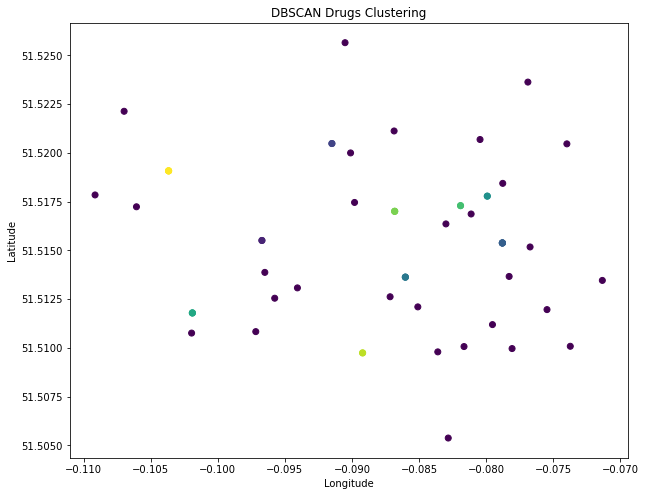

In [69]:
plt.figure(figsize=(10, 8)) 
plt.scatter(x2, y2,c=db2.labels_)
plt.title('DBSCAN Drugs Clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()